In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append("C:\\Abel\\Trabajo\\Proyectos Ciencia de Datos\\House Price Prediction\\src\\visualization")
import visualize

Cargando datos  

Loading data  

This dataset provides comprehensive information for house price prediction, with 13 column names:  


Price: The price of the house.  

Area: The total area of the house in square feet.  

Bedrooms: The number of bedrooms in the house.  

Bathrooms: The number of bathrooms in the house.  

Stories: The number of stories in the house.  

Mainroad: Whether the house is connected to the main road (Yes/No).  

Guestroom: Whether the house has a guest room (Yes/No).  

Basement: Whether the house has a basement (Yes/No).  

Hot water heating: Whether the house has a hot water heating system (Yes/No).  

Airconditioning: Whether the house has an air conditioning system (Yes/No).  

Parking: The number of parking spaces available within the house.  

Prefarea: Whether the house is located in a preferred area (Yes/No).  

Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).  


In [3]:
sys.path.append("C:\\Abel\\Trabajo\\Proyectos Ciencia de Datos\\House Price Prediction\\src\\data")
import carga_datos
df = carga_datos.carga_datos('C:\\Abel\\Trabajo\\Proyectos Ciencia de Datos\\House Price Prediction\\data\\processed\\Housing.csv')
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


Numeric variables

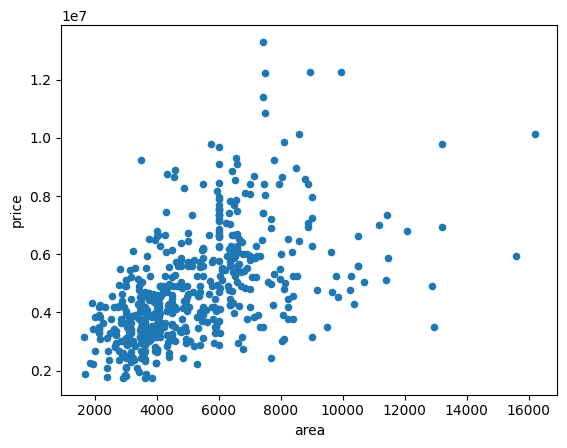

In [4]:
visualize.scatterplot_price_area(df)

Price outliers

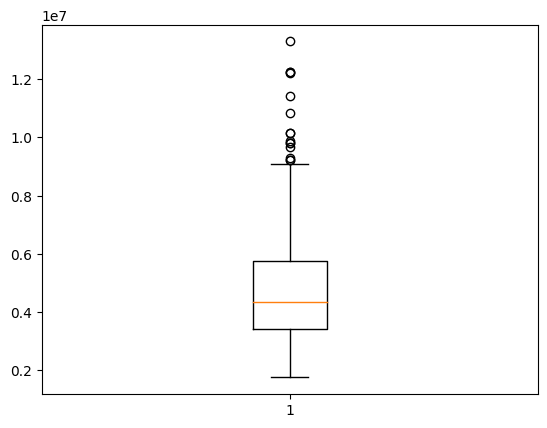

In [5]:
visualize.boxplot_price(df)

Area outliers

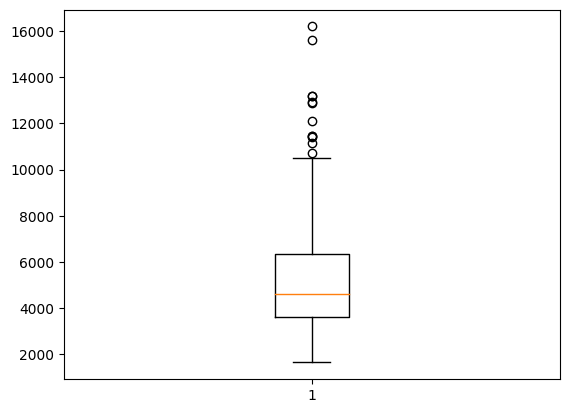

In [6]:
visualize.boxplot_area(df)

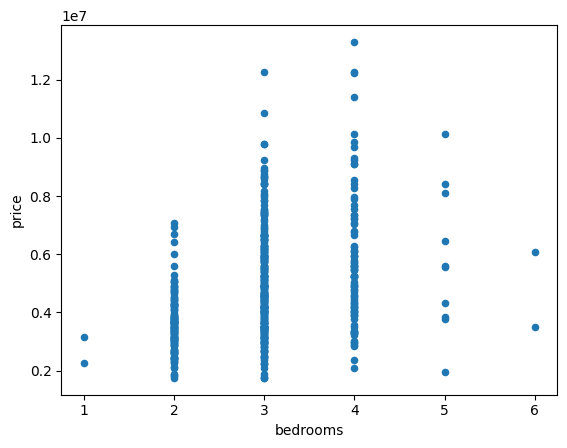

In [7]:
# Graphing the price based on the number of bedrooms
visualize.precio_segun_cant_bedrooms(df)

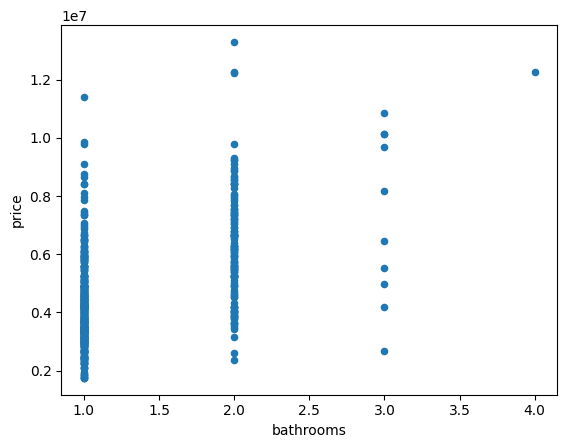

In [8]:
# Graphing the price based on the number of bathrooms
visualize.precio_segun_cant_bathrooms(df)

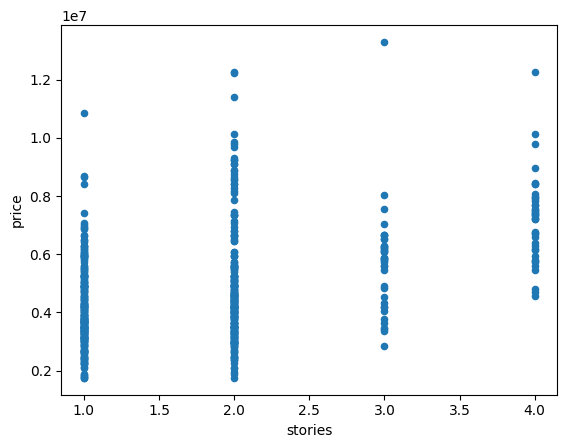

In [9]:
# Graphing the price based on the number of stories in the house
visualize.precio_segun_cant_stories(df)

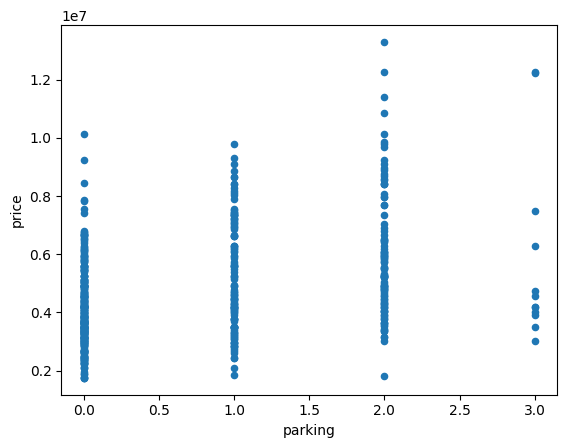

In [10]:
# Graphing the price based on the number of parkings within the house
visualize.precio_segun_cant_parking(df)

Histogramas

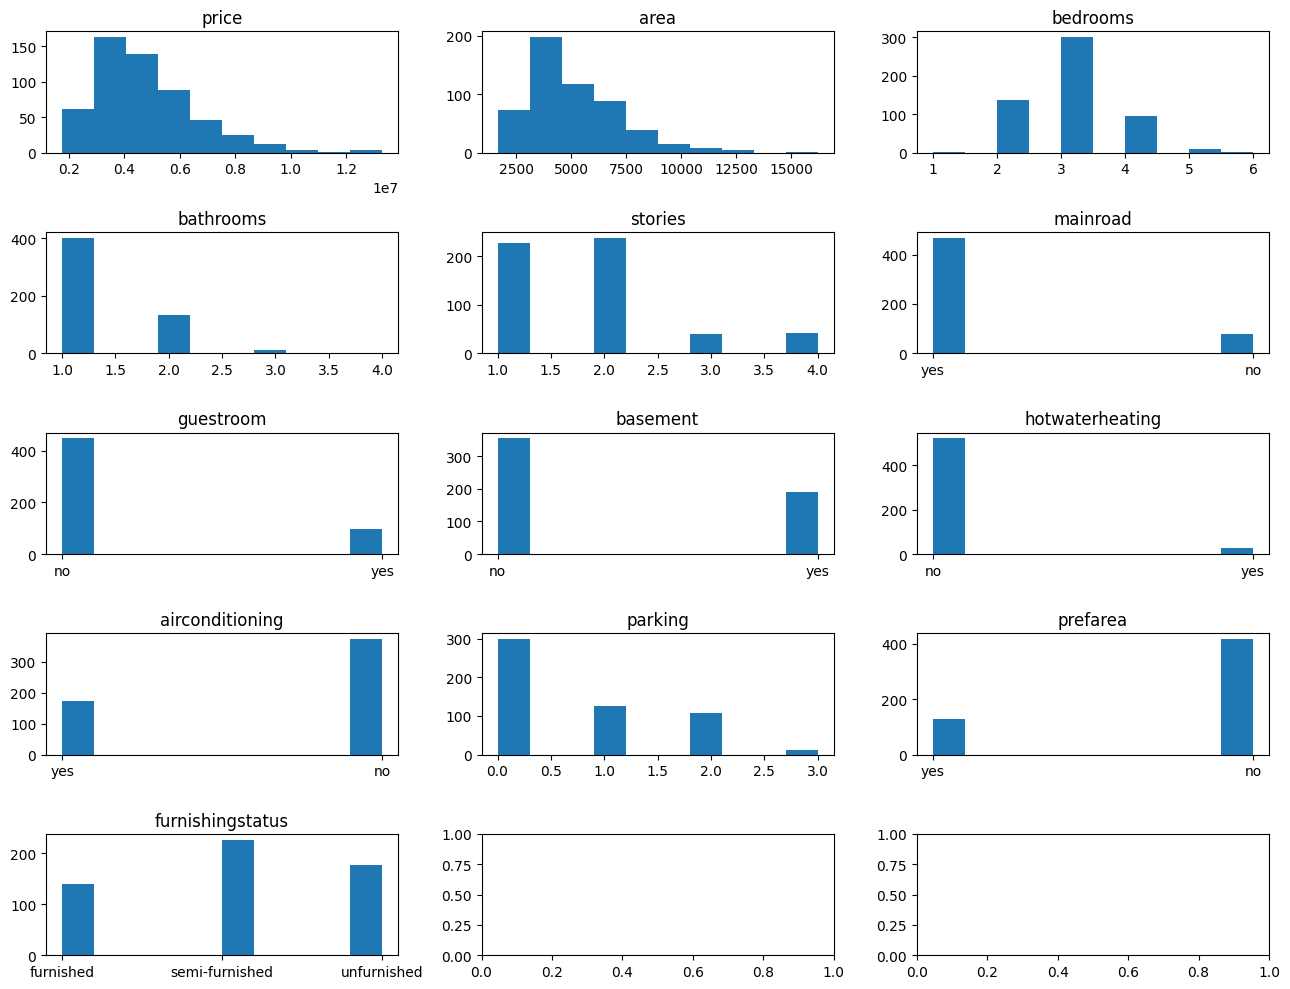

In [11]:
visualize.histogramas_columnas(df)

In [12]:
import Transform_cat_a_num_get_dummies
print("Las variable categoricas son: ",Transform_cat_a_num_get_dummies.cate(df))

Las variable categoricas son:  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [13]:
df_num = Transform_cat_a_num_get_dummies.cat_to_num(df)

Machine Learning Models

In [14]:
sys.path.append("C:\\Abel\\Trabajo\\Proyectos Ciencia de Datos\\House Price Prediction\\src\\models")
import train_model
X,y = train_model.sep_X_de_y(df_num)

Splitting the Dataframe (df_num) in train, test and validation

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#train_set, df_test_val = train_test_split(df_num, test_size=0.4, train_size=None, random_state=42, shuffle=True, stratify=None)

In [15]:
train_set, val_set, test_set = train_model.train_val_test_split(df_num)

Splitting X_train_R from y_train_R, X_test_R from y_test_R and X_val_R from y_val_R 

In [32]:
X_train = train_set.drop('price', axis=1)
y_train = train_set['price'].copy()

In [33]:
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

In [34]:
X_val = val_set.drop('price', axis=1)
y_val = val_set['price'].copy()

Scaling


In [35]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
X_train_scaled = robustscaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_val_scaled = robustscaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled)
X_test_scaled = robustscaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

Support Vector Machine (SVM)

In [36]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

Instantiating the LinerRegression class and training model

In [37]:
# Ajustar el modelo de regresión SVR
svr = SVR()

In [38]:
# Ajustar el modelo de regresión lineal
lin_reg = LinearRegression()

In [39]:
from sklearn.ensemble import VotingRegressor

In [40]:
ensemble_reg = VotingRegressor(estimators=[('linear', lin_reg), ('svr', svr)], weights=[0.4, 0.6])

In [41]:
#logra una distribucion igualmente probable del parametro que se le especifique
from scipy.stats import uniform

In [42]:
# Definimos el espacio de búsqueda para los hiperparámetros
param_distributions = {'linear__fit_intercept': [True, False], 'svr__C': uniform(1, 100000), 'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [43]:
# Creamos un objeto RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(ensemble_reg, param_distributions, n_iter=50, scoring='r2', cv=5)

In [44]:
# Realizamos la búsqueda aleatoria
rand_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=VotingRegressor(estimators=[('linear',
                                                          LinearRegression()),
                                                         ('svr', SVR())],
                                             weights=[0.4, 0.6]),
                   n_iter=50,
                   param_distributions={'linear__fit_intercept': [True, False],
                                        'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023890523E50>,
                                        'svr__kernel': ['linear', 'poly', 'rbf',
                                                        'sigmoid']},
                   scoring='r2')

In [46]:
# Mostramos los mejores hiperparámetros encontrados
print(f'Best hyperparameters: {rand_search.best_params_}')

Best hyperparameters: {'linear__fit_intercept': False, 'svr__C': 73494.85390801623, 'svr__kernel': 'linear'}


In [47]:
# Evaluamos el rendimiento del mejor modelo en el conjunto de prueba
best_model = rand_search.best_estimator_
r2_score = best_model.score(X_val_scaled, y_val)
print(f'R^2 score on val set: {r2_score}')

R^2 score on val set: 0.6995309378542676


In [48]:
# Evaluamos el rendimiento del mejor modelo en el conjunto de prueba
best_model = rand_search.best_estimator_
r2_score = best_model.score(X_test_scaled, y_test)
print(f'R^2 score on test set: {r2_score}')

R^2 score on test set: 0.6252350895829246


In [51]:
!pip freeze > requirements.txt